# 1) Checking your installation

You can run the following code to check the versions of the packages on your system:
(in IPython notebook, press `shift` and `return` together to execute the contents of a cell)

In [4]:
from __future__ import print_function

import numpy as np
print('numpy:', numpy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

import pandas as pd
print('pandas:', pandas.__version__)

import re
print('re:', re.__version__)

numpy: 1.19.1
matplotlib: 2.2.3
scikit-learn: 0.23.2
pandas: 0.23.4
re: 2.2.1


# 2) Regular Expression

- In this tutorial, you will learn about regular expressions (RegEx), and use Python's re module to work with RegEx (with the help of examples).
- A Regular Expression (RegEx) is a sequence of characters that defines a search pattern. For example,
    ```
    ^p...w$
    ```
- The above code defines a RegEx pattern. The pattern is: any five letter string starting with p and ending with w.
- A pattern defined using RegEx can be used to match against a string.

|Expression|String|Matched?|
|----------|:-------------:|------:|
| ^p...i$ | pwi | No match |
| - | pengi | Match |
| - | pwwwi | Match |
| - | pwwwii | No match |


- Python has a module named re to work with RegEx. Here's an example:

In [10]:
pattern = '^p...i$'
test_string = 'peng-wenwei'
result = re.match(pattern, test_string)

if result:
  print("Search successful.")
else:
  print("Search unsuccessful.")

Search unsuccessful.


- Here, we used re.match() function to search pattern within the test_string. 
- The method returns a match object if the search is successful. If not, it returns None.

In [12]:
print(result)

None


In [13]:
pattern = '^p...i$'
test_string = 'pengi'
result = re.match(pattern, test_string)

if result:
  print("Search successful.")
else:
  print("Search unsuccessful.")	

Search successful.


In [15]:
print(result)

<re.Match object; span=(0, 5), match='pengi'>


(None, <re.Match object; span=(0, 5), match='pengi'>)

In [16]:
result[0]

'pengi'

- There are other several functions defined in the re module to work with RegEx. 
- Before we explore that, let's learn about regular expressions themselves.

- Specify Pattern Using RegEx
    - To specify regular expressions, metacharacters are used. 
    - In the above example, ^ and $ are metacharacters.

- **MetaCharacters**
  
    - Metacharacters are characters that are interpreted in a special way by a RegEx engine. 
    - Here's a list of metacharacters:
```
[] . ^ $ * + ? {} () \ |
```

- Square brackets: [] 

    - Square brackets specifies a set of characters you wish to match.


|Expression|String|	Matched?|
|----------|:-------------:|------:|
|[abc]|	a| 1 match|
 |- |ac|2 matches|
 |- |Hey Joe|	No match|
 |- |abc de ca|5 matches|
 
 
- Here, [abc] will match if the string you are trying to match contains any of the a, b or c.

- You can also specify a range of characters using - inside square brackets.

    - [a-e] is the same as [abcde].
    - [1-4] is the same as [1234].
    - [0-39] is the same as [01239].
    
- You can complement (invert) the character set by using caret ^ symbol at the start of a square-bracket.

    - [^abc] means any character except a or b or c.
    - [^0-9] means any non-digit character.

- Period: . 

    - A period matches any single character (except newline '\n').

|Expression	|String	|Matched?|
|----------|:-------------:|------:|
|..|	a|	No match|
|..| ac	|1 match|
|.. |acd|	1 match|
|..|acde	|2 matches (contains 4 characters)|

-  Caret: ^ 

    - The caret symbol ^ is used to check if a string starts with a certain character.

|Expression|	String|	Matched?|
|----------|:-------------:|------:|
|^a	|a	|1 match|
|^a	|abc	|1 match|
|^a	|bac|	No match|
|^ab |	abc	|1 match|
|^ab |acb|	No match (starts with a but not followed by b)|

- Dollar: \$
    - The dollar symbol $ is used to check if a string ends with a certain character.

|Expression|	String	|Matched?|
|----------|:-------------:|------:|
|a\$	|a	 | 1 match|
|a\$	|formula	 |1 match|
|a\$	|cab	|No match|

- Star: \* 

    - The star symbol * matches zero or more occurrences of the pattern left to it.

|Expression	|String	|Matched?|
|----------|:-------------:|------:|
|ma*n|	mn	|1 match|
|ma*n|man	|1 match|
|ma*n|maaan	|1 match|
|ma*n|main	|No match (a is not followed by n)|
|ma*n|woman	|1 match|

- Plus: \+ 

    - The plus symbol + matches one or more occurrences of the pattern left to it.

|Expression	|String	|Matched?|
|----------|:-------------:|------:|
|ma+n|	mn	|No match (no a character)|
|ma+n|man	|1 match|
|ma+n|maaan	|1 match|
|ma+n|main	|No match (a is not followed by n)|
|ma+n|woman	|1 match|

- Question Mark: ? 

    - The question mark symbol ? matches zero or one occurrence of the pattern left to it.

|Expression	|String	|Matched?|
|----------|:-------------:|------:|
|ma?n	|mn	|1 match|
|ma?n|man|	1 match|
|ma?n|maaan|	No match (more than one a character)|
|ma?n|main	|No match (a is not followed by n)|
|ma?n|woman	|1 match|

- Braces: {}

    - Consider this code: {n,m}. This means at least n, and at most m repetitions of the pattern left to it.

|Expression	|String	|Matched?|
|----------|:-------------:|------:|
|a{2,3}	|abc dat	|No match|
|a{2,3}|abc daat	|1 match (at daat)|
|a{2,3}|aabc daaat	|2 matches (at aabc and daaat)|
|a{2,3}|aabc daaaat	|2 matches (at aabc and daaaat)|


    - Let's try one more example. This RegEx [0-9]{2, 4} matches at least 2 digits but not more than 4 digits

|Expression	|String	|Matched?|
|----------|:-------------:|------:|
|[0-9]{2,4}	|ab123csde	|1 match (match at ab123csde)|
|[0-9]{2,4}	|12 and 345673	|3 matches (12, 3456, 73)|
|[0-9]{2,4}	|1 and  2	|No match|

- Alternation: \|
   - Vertical bar \| is used for alternation (or operator).

|Expression	|String	|Matched?|
|----------|:-------------:|------:|
|a\|b|	cde|	No match|
|a\|b||ade	|1 match (match at ade)|
|a\|b||acdbea|	3 matches (at acdbea)|

   - Here, a\|b match any string that contains either a or b

- Group: ()
    - Parentheses () is used to group sub-patterns. 
    - For example, (a|b|c)xz match any string that matches either a or b or c followed by xz

|Expression	|String	|Matched?|
|----------|:-------------:|------:|
|(a\|b\|c)|x|	ab xz|	No match|
|(a\|b\|c)|abxz	|1 match (match at abxz)|
|(a\|b\|c)|axz cabxz|	2 matches (at axzbc cabxz)|

- Backslash: \\ 

    - Backlash \\ is used to escape various characters including all metacharacters. For example,
   
    ```
    \$a
    ```
    - match if a string contains \$ followed by a. 
    - Here, \$ is not interpreted by a RegEx engine in a special way.

    - If you are unsure if a character has special meaning or not, you can put \\ in front of it. This makes sure the character is not treated in a special way.


- Special Sequences

    - Special sequences make commonly used patterns easier to write. Here's a list of special sequences:
        - \\A  Matches if the specified characters are at the start of a string.
        - \\b - Matches if the specified characters are at the beginning or end of a word.
        - \\B - Opposite of \b. Matches if the specified characters are not at the beginning or end of a word.
        - \\d - Matches any decimal digit. Equivalent to [0-9]
        - \\D - Matches any non-decimal digit. Equivalent to [^0-9]
        - \\s - Matches where a string contains any whitespace character. Equivalent to [ \\t\\n\\r\\f\\v].
        - \\S - Matches where a string contains any non-whitespace character. Equivalent to [^ \\t\\n\\r\\f\\v].
        - ...

- Tip: 
    - To build and test regular expressions, you can use RegEx tester tools such as regex101: https://regex101.com/. 
    - This tool not only helps you in creating regular expressions, but it also helps you learn it.


## RegEx  in Python

- Python has a module named re to work with regular expressions. To use it, we need to import the module.
    ```python
    import re
    ```   
- The module defines several functions and constants to work with RegEx。

### re.findall()

   - The re.findall() method returns a list of strings containing all matches.
   
    ```python
    re.findall()

    ```


In [43]:
# Program to extract numbers from a string
import re

string = 'hello 2020, I am 22 years old'
pattern = '\d+'

result = re.findall(pattern, string) 
print(result)

# Output: ['2020', '22']
# If the pattern is not found, re.findall() returns an empty list.

['2020', '22']


 ### re.split()
 - The re.split method splits the string where there is a match 
 - and returns a list of strings where the splits have occurred.

In [44]:
string = 'Highet:12; Price:89000HKD.'
pattern = '\d+'

result = re.split(pattern, string) 
print(result)

# Output: ['Highet:', '; Price:', 'HKD.']
# If the pattern is not found, re.split() returns a list containing the original string.

['Highet:', '; Price:', 'HKD.']


In [45]:
#You can pass maxsplit argument to the re.split() method. 
# It's the maximum number of splits that will occur.

string = 'Highet:12; Price:89000HKD.'
pattern = '\d+'

# maxsplit = 1
# split only at the first occurrence
result = re.split(pattern, string, 1) 
print(result)

['Highet:', '; Price:89000HKD.']


### re.search() 
- The re.search() method takes two arguments: 
    - a pattern and a string. 
    - The method looks for the first location where the RegEx pattern produces a match with the string.

- If the search is successful, re.search() returns a match object; if not, it returns None.

```python
match = re.search(pattern, str)
```

In [46]:
string = "Python is fun"

# check if 'Python' is at the beginning
match = re.search('\APython', string)

if match:
  print("pattern found inside the string")
else:
  print("pattern not found")  

# Output: pattern found inside the string

pattern found inside the string


### Using r prefix before RegEx

- When r or R prefix is used before a regular expression, it means raw string. 
- For example, '\\n' is a new line whereas r'\\n' means two characters: a backslash \\ followed by n.
- Backlash \\ is used to escape various characters including all metacharacters. 
- However, using r prefix makes \\ treat as a normal character.

In [47]:
string = '\n and \r are escape sequences.'

result = re.findall(r'[\n\r]', string) 
print(result)
# Output: ['\n', '\r']

['\n', '\r']


In [65]:
# cleaning html example

"""
@purpose: collect the number of patents for each query
@author: wenwei peng
@contact: wpengad@ust.hk
@time: 2020-09-23
"""
import urllib
import requests
import time
#BeautifulSoup is a package for read html doc
#from bs4 import BeautifulSoup
import pandas as pd
from multiprocessing import Pool
import re

def gen_query():
    query = []
    for state in ['CN']: #'KR','JP','DE','TW','HK','SG']:
        for year in range(1976,2019):
            query.append('ISD/{0} AND ABST/(method or process) AND ACN/{1}'.format(year,state))
    return query

def get_num(query):
    # pretend to be a Browser
    headers = {
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Accept-Encoding': 'gzip, deflate',
        'Accept-Language': 'en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7,zh-TW;q=0.6',
        'Connection': 'keep-alive',
        'Host': 'patft.uspto.gov',
        'Referer': 'http://patft.uspto.gov/netahtml/PTO/search-adv.htm',
        'Upgrade-Insecure-Requests': '1',
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'
    }
    param_list= {
        'Sect1': 'PTO2',
        'Sect2': 'HITOFF',
        'u': '/netahtml/PTO/search-adv.htm',
        'r': '0',
        'p': '1',
        'f': 'S',
        'l': '50',
        'Query': query,
        'd': 'PTXT'
    }
    url = 'http://patft.uspto.gov/netacgi/nph-Parser?' + urllib.parse.urlencode(param_list)
    
    # sending requests 
    try:
        web_data = requests.get(url, headers = headers)
        if web_data.status_code != 200:
            f = open('Badlist.txt','a',encoding='utf-8',errors='ignore') 
            f.write('query:{0}'.format(query) + "\n")
            f.close()
            pass
        else:
            if 'No patents have matched your query' in web_data.text:
                out = 0
            elif 'Single Document' in web_data.text:
                out = 1
            else:
                out = re.findall('''<strong>(.*?)</strong>''',web_data.text.lower().strip().replace("\n",""))
            
            print(query,"=>>>",out)
            f = open('./US_Patent/Output/Query_Count_By_State_Year.txt','a',encoding='utf-8',errors='ignore') 
            f.write('query:{0}; num:{1};'.format(query,out) + "\n")
            f.close()
    except Exception as e:
        print(e)
        f = open('Badlist.txt','a',encoding='utf-8',errors='ignore') 
        f.write('query:{0}'.format(query) + "\n")
        f.close()
        pass
# query_list = gen_query()
# for query in query_list:
#     get_num(query)


In [67]:
# use % to replace blank space 
# sometimes this method won't work for unicode characters: e.g. 你好
url = '''http://patft.uspto.gov/netacgi/nph-Parser?
Sect1=PTO2&
Sect2=HITOFF&
u=%2Fnetahtml%2FPTO%2Fsearch-adv.htm&
r=0&
p=1&
f=S&
l=50&
Query=ISD%2F2018+AND+ABST%2F%28method+or+process%29+AND+ACN%2FCN&
d=PTXT'''
url = url.replace("\n","")
headers = {
 'Accept-Encoding': 'gzip, deflate',
 'Accept-Language': 'en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7,zh-TW;q=0.6',
 'Connection': 'keep-alive',
 'Host': 'patft.uspto.gov',
 'Referer': 'http://patft.uspto.gov/netahtml/PTO/search-adv.htm',
 'Upgrade-Insecure-Requests': '1',
 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'
 }
web_data = requests.get(url, headers = headers) # mimic a normal browser sending a get request
web_data.text

'<HTML>\n<HEAD>\n<BASE TARGET="_top">\n<TITLE>Patent Database Search Results: ISD/2018 AND ABST/(method or process) AND ACN/CN in US Patent Collection</TITLE>\n<script language="javascript">\nvar clicked = false;\n// Shamelessly adapted from http://www.randomsnippets.com/2008/02/21/how-to-dynamically-add-form-elements-via-javascript/ 09-04-14. jh\nfunction addInput(divName,btnName,btnLabel) {\n   var newdiv = document.createElement(\'div\');\n   newdiv.innerHTML = "<input type=\'hidden\' name=\'" + btnName +\n\t\t\t"\' value=\'" + btnLabel + "\'>";\n   divName.appendChild(newdiv);\n}\n// -- 09-04-14.\nfunction check(form1,formBtn) {\n   // if submitted by <enter> key, add a submit button lookalike to prevent\n   // 1003 errs from BRS. 9-4-14 jh\n   if (!clicked)\n      addInput (form1,formBtn.name,formBtn.value);\n   return true;\n}\nfunction unesc(){\n   srchForm.Srch1.value = unescape(srchForm.Srch1.value);\n   if (srchForm.Srch2)\n      srchForm.Srch2.value = unescape(srchForm.Srch2

In [125]:
# one record 

#<TD valign=top>
#2</TD>\n<TD valign=top><A  
#HREF=/netacgi/nph-Parser?Sect1=PTO2&Sect2=HITOFF&u=%2Fnetahtml%2FPTO%2Fsearch-adv.htm&r=2&p=1&f=G&l=50&d=PTXT&S1=((2018$.PD.+AND+(method+OR+process).ABTX.)+AND+CN.ASCO.)&OS=ISD/2018+AND+ABST/(method+or+process)+AND+ACN/CN&RS=((ISD/2018+AND+ABST/(method+OR+process))+AND+ACN/CN)
#>10,165,615</A></TD>\n     <TD valign=baseline><IMG border=0 src="/netaicon/PTO/ftext.gif" alt="Full-Text"></TD>\n     <TD valign=top><A  HREF=/netacgi/nph-Parser?Sect1=PTO2&Sect2=HITOFF&u=%2Fnetahtml%2FPTO%2Fsearch-adv.htm&r=2&p=1&f=G&l=50&d=PTXT&S1=((2018$.PD.+AND+(method+OR+process).ABTX.)+AND+CN.ASCO.)&OS=ISD/2018+AND+ABST/(method+or+process)+AND+ACN/CN&RS=((ISD/2018+AND+ABST/(method+OR+process))+AND+ACN/
#CN)>Communication method, and terminal\n</A></TD>\n<DOCS: 6993>\n

result = re.findall(r"top>(.*?)<\/TD><.*?HREF=(.*?)>(.*?)<.*?CN\)>(.*?)</A",web_data.text.replace("\n",""))
result[0]

('1',
 '/netacgi/nph-Parser?Sect1=PTO2&Sect2=HITOFF&u=%2Fnetahtml%2FPTO%2Fsearch-adv.htm&r=1&p=1&f=G&l=50&d=PTXT&S1=((2018$.PD.+AND+(method+OR+process).ABTX.)+AND+CN.ASCO.)&OS=ISD/2018+AND+ABST/(method+or+process)+AND+ACN/CN&RS=((ISD/2018+AND+ABST/(method+OR+process))+AND+ACN/CN)',
 '10,165,618',
 'Service processing method and device')

**Learn More at** : https://docs.python.org/3/library/re.html

# 3) Pandas

In [20]:
import pandas as pd

- In computer programming, pandas is a software library written for the Python programming language for **data manipulation and analysis**.

- In particular, it offers data structures and operations for manipulating **numerical tables and time series**.

- Data structures

    - Dimensions
    
        - **Series**: 1D labeled homogeneously-typed array
        - **DataFrame**: General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed column


- What kind of data does pandas handle?

https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html

- IO tools (text, CSV, HDF5, …)
    - https://pandas.pydata.org/docs/user_guide/io.html
    
    

In [25]:
# define your working dir
path = "./tweets_loc/"

In [24]:
!head -10 ./tweets_loc/loc_tweets.csv
## count the number of lines
!wc -l ./tweets_loc/loc_tweets.csv
## select the first 5000 row and save it as loc_tweets_head.csv
!head -5000 ./tweets_loc/loc_tweets.csv > ./tweets_loc/loc_tweets_head.csv

id,content,comment_num,crawl_time,created_at,year,month,day,time,like_num,location_map_info,lng,lat,repost_num,tool,user_id,weibo_url
1889772911_IiABZFoig,感觉做了妈妈之后 已经放弃了自我 化妆的几率为0。[拜拜] 佛山·原生态休闲酒店 显示地图,,1575140622,2019-11-30 12:38,2019,11,30, 12:38,,"113.15921,23.029016",113.15921000000002,23.029016,,iPhone客户端,1889772911,'https://weibo.com/1889772911/IiABZFoig'
1889772911_IgtKw6SJ5,发际线后移[拜拜][拜拜][拜拜][拜拜][拜拜][拜拜] 佛山 显示地图,,1575140622,2019-11-16 15:29,2019,11,16, 15:29,,"113.076988,22.995754",113.07698799999999,22.995754,,iPhone客户端,1889772911,'https://weibo.com/1889772911/IgtKw6SJ5'
1889772911_Ifx1ojWQm,匆忙的♨️。。 贺州·贺州西溪森林温泉度假村 显示地图[组图共4张],,1575140622,2019-11-10 09:58,2019,11,10, 09:58,,"111.976089,24.35544",111.97608899999999,24.355439999999998,,iPhone客户端,1889772911,'https://weibo.com/1889772911/Ifx1ojWQm'
1889773457_Hr9Vjd4qR,分享图片 澳大利亚 显示地图[组图共9张],,1575140633,2019-04-24 22:30,2019,4,24, 22:30,,"151.20382508869,-33.878895133828",151.20382508869,-33.878895133828,,iPhone客户端,1889773457,'https:/

In [34]:
tweets = pd.read_csv(path + "loc_tweets.csv")
#see a few rows 
tweets.head()

,id,content,comment_num,crawl_time,created_at,year,month,day,time,like_num,location_map_info,lng,lat,repost_num,tool,user_id,weibo_url
0,1889772911_IiABZFoig,感觉做了妈妈之后 已经放弃了自我 化妆的几率为0。[拜拜] 佛山·原生态休闲酒店 显示地图,NaN,1575140622,2019-11-30 12:38,2019,11,30,12:38,NaN,"113.15921,23.029016",113.159210,23.029016,NaN,iPhone客户端,1889772911,'https://weibo.com/1889772911/IiABZFoig'
1,1889772911_IgtKw6SJ5,发际线后移[拜拜][拜拜][拜拜][拜拜][拜拜][拜拜] 佛山 显示地图,NaN,1575140622,2019-11-16 15:29,2019,11,16,15:29,NaN,"113.076988,22.995754",113.076988,22.995754,NaN,iPhone客户端,1889772911,'https://weibo.com/1889772911/IgtKw6SJ5'
2,1889772911_Ifx1ojWQm,匆忙的♨️。。 贺州·贺州西溪森林温泉度假村 显示地图[组图共4张],NaN,1575140622,2019-11-10 09:58,2019,11,10,09:58,NaN,"111.976089,24.35544",111.976089,24.355440,NaN,iPhone客户端,1889772911,'https://weibo.com/1889772911/Ifx1ojWQm'
3,1889773457_Hr9Vjd4qR,分享图片 澳大利亚 显示地图[组图共9张],NaN,1575140633,2019-04-24 22:30,2019,4,24,22:30,NaN,"151.20382508869,-33.878895133828",151.203825,-33.878895,NaN,iPhone客户端,1889773457,'https://weibo.com/1889773457/Hr9Vjd4qR'
4,1889773457_HqW4Kmwuy,不拍张剪刀手✌️就要翻脸。 澳大利亚·The University of Sydney 显示...,NaN,1575140633,2019-04-23 11:14,2019,4,23,11:14,NaN,"151.18876647,-33.88779449",151.188766,-33.887794,NaN,iPhone客户端,1889773457,'https://weibo.com/1889773457/HqW4Kmwuy'


In [49]:
tweets['year'].mean()

2017.5422542254225

In [51]:
tweets['year'].max()

2019

In [52]:
tweets['year'].min()

2011

In [35]:
tweets['id'].nunique()

9999

In [36]:
tweets['user_id'].nunique()

860

In [53]:
tweets.describe()

,comment_num,crawl_time,year,month,day,like_num,lng,lat,repost_num,user_id
count,0.0,9.999000e+03,9999.000000,9999.000000,9999.000000,0.0,9999.000000,9999.000000,0.0,9.999000e+03
mean,NaN,1.575200e+09,2017.542254,6.827283,15.801980,NaN,109.285132,30.888209,NaN,1.889825e+09
std,NaN,3.401888e+04,2.213045,3.189625,8.875052,NaN,31.022151,9.105544,NaN,3.204905e+04
min,NaN,1.575141e+09,2011.000000,1.000000,1.000000,NaN,-123.185455,-45.023350,NaN,1.889773e+09
25%,NaN,1.575165e+09,2018.000000,4.000000,8.000000,NaN,111.680134,24.437947,NaN,1.889796e+09
50%,NaN,1.575206e+09,2018.000000,7.000000,16.000000,NaN,115.840431,31.244100,NaN,1.889822e+09
75%,NaN,1.575227e+09,2019.000000,10.000000,24.000000,NaN,119.210389,36.596008,NaN,1.889850e+09
max,NaN,1.575254e+09,2019.000000,12.000000,31.000000,NaN,178.013565,90.000000,NaN,1.889884e+09


In [37]:
tweets['year'].value_counts()

2019    4921
2018    3021
2013     786
2014     614
2012     412
2015     172
2016      39
2017      32
2011       2
Name: year, dtype: int64

In [63]:
tweets['tool'].value_counts()[0:10]

iPhone客户端          5282
Android客户端          508
iPhone X            293
全面屏vivo X20Plus     146
HUAWEI P20          121
微博视频                119
华为P9手机摄影再突破         116
iPhone              111
iPhone 6s            92
坚果手机 Pro             91
Name: tool, dtype: int64

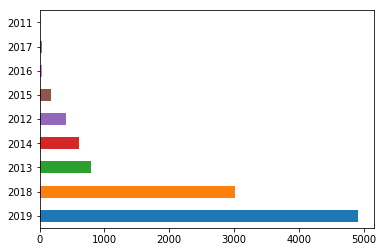

In [39]:
# plot year counts
tweets.year.value_counts().plot(kind = 'barh')

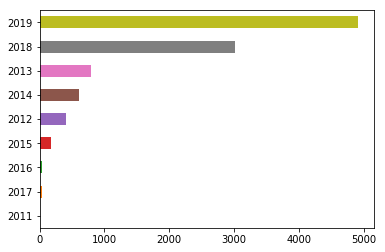

In [38]:
# sorted
tweets.year.value_counts().sort_values().plot(kind = 'barh')

In [27]:
# select a subset of data with 'user_id' equal to 1889773457
tweets.loc[tweets['user_id'] == 1889773457]

,id,content,comment_num,crawl_time,created_at,year,month,day,time,like_num,location_map_info,lng,lat,repost_num,tool,user_id,weibo_url
3,1889773457_Hr9Vjd4qR,分享图片 澳大利亚 显示地图[组图共9张],NaN,1575140633,2019-04-24 22:30,2019,4,24,22:30,NaN,"151.20382508869,-33.878895133828",151.203825,-33.878895,NaN,iPhone客户端,1889773457,'https://weibo.com/1889773457/Hr9Vjd4qR'
4,1889773457_HqW4Kmwuy,不拍张剪刀手✌️就要翻脸。 澳大利亚·The University of Sydney 显示...,NaN,1575140633,2019-04-23 11:14,2019,4,23,11:14,NaN,"151.18876647,-33.88779449",151.188766,-33.887794,NaN,iPhone客户端,1889773457,'https://weibo.com/1889773457/HqW4Kmwuy'


In [28]:
# select a subset of data with 'content' contains the word "Sydney"
tweets.loc[tweets['content'].str.contains("Sydney",regex=False,na=False)]

,id,content,comment_num,crawl_time,created_at,year,month,day,time,like_num,location_map_info,lng,lat,repost_num,tool,user_id,weibo_url
4,1889773457_HqW4Kmwuy,不拍张剪刀手✌️就要翻脸。 澳大利亚·The University of Sydney 显示...,NaN,1575140633,2019-04-23 11:14,2019,4,23,11:14,NaN,"151.18876647,-33.88779449",151.188766,-33.887794,NaN,iPhone客户端,1889773457,'https://weibo.com/1889773457/HqW4Kmwuy'
5839,1889832774_Ai1Lkax7n,回家的節奏～ 我在:澳大利亚Sydney 显示地图[组图共9张],NaN,1575214844,2013-11-10 06:00:35,2013,11,10,06:00:35,NaN,"151.1672269,-33.9363299",151.167227,-33.936330,NaN,Android客户端,1889832774,'https://weibo.com/1889832774/Ai1Lkax7n'


In [ ]:
# select a subset of data with 'content' contains the word "Sydney"
tweets.loc[tweets['content'].str.contains("Sydney",regex=False,na=False)]

In [41]:
# use regular expression to extract a new variable from existing one
tweets['weibo_id'] = tweets['id'].str.extract("_(.*?)$")

In [42]:
tweets['id'][0],tweets['weibo_id'][0]

('1889772911_IiABZFoig', 'IiABZFoig')

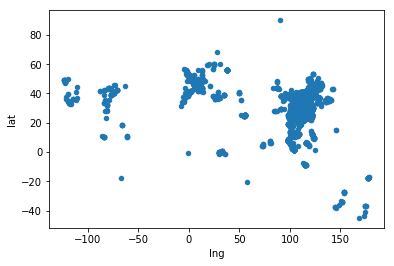

In [30]:
tweets.plot.scatter(x='lng',y='lat')

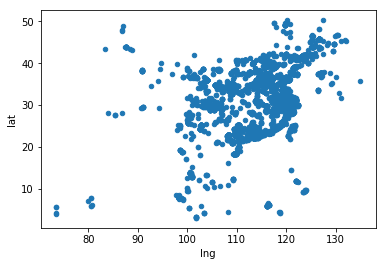

In [31]:
#china 
filter_cn = (tweets['lat']>3) & (tweets['lat']<53) & (tweets['lng']<135) & (tweets['lng']>73)
tweets_cn = tweets.loc[filter_cn]
tweets_cn.plot.scatter(x='lng',y='lat')

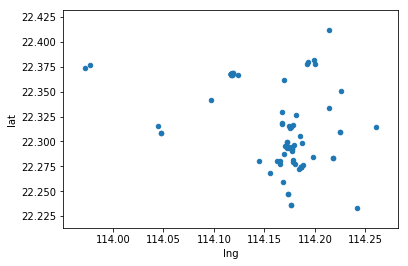

In [32]:
# Lat-long coorditates for cities in Hong Kong are in range: 
# Latitude from 22.22623 to 22.45007 and longitude from 113.97157 to 114.26667.
filter_hk = (tweets['lat']>22.22623) & (tweets['lat']<22.45007) & (tweets['lng']<114.26667) & (tweets['lng']>113.97157)
tweets_hk = tweets.loc[filter_hk]
tweets_hk.plot.scatter(x='lng',y='lat')

- reshape the dataframe
    - https://pandas.pydata.org/docs/user_guide/reshaping.html
- merge with other dataframes
    - https://pandas.pydata.org/docs/user_guide/merging.html

In [ ]:
# Easy Output 
- https://pandas.pydata.org/docs/user_guide/io.html
# export data to stata dta file
tweets.to_stata(path + "test.dta",index= None)
# export data to csv file
tweets.to_csv(path + "test.csv",index= None)
# export data to excel file
tweets.to_excel(path + "test.xlsx",index= None)
# and many others ...

**Learn More From**: https://pandas.pydata.org/docs/user_guide/index.html